In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta 

In [2]:
import statistics as stat
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

# 1-5

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector = inspect(engine)

In [6]:
base = automap_base()
base.prepare(autoload_with = engine)
base.classes.keys()

['measurement', 'station']

In [7]:
station = base.classes.station
measurement = base.classes.measurement

In [8]:
session = Session(engine)

# looking at columns

In [9]:
for x in inspector.get_columns('measurement'):
    print(x['name'])

id
station
date
prcp
tobs


In [10]:
for x in inspector.get_columns('station'):
    print(x['name'])

id
station
name
latitude
longitude
elevation


# finding dates

In [11]:
last_date = session.query(measurement, func.max(measurement.date))
for x in last_date:
    print(x[1])

2017-08-23


In [12]:
year_ago = dt.datetime(2017,8,23) - relativedelta(months = 12)
last_year = session.query(measurement)\
    .filter(measurement.date >= year_ago).all()

# making dataframe

In [13]:
dte = []
prcp = []
for x in last_year:
    dte.append(x.date)
    prcp.append(x.prcp)
    
data = {'date' : dte, 'prcp' : prcp}

date_prcp = pd.DataFrame(data)

In [14]:
date_prcp.sort_values('date', inplace = True)
date_prcp

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


# plotting and stats

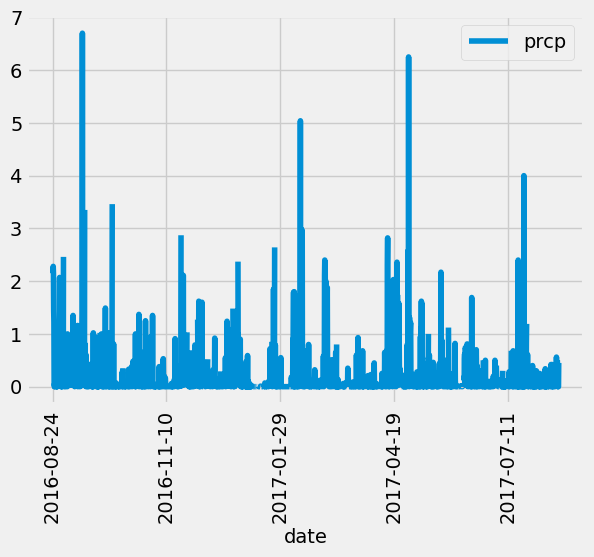

In [15]:
date_prcp.set_index('date').plot()
plt.xticks(rotation = 90)
plt.show()

In [16]:
date_prcp.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# station analysis

In [17]:
print(f"There are {session.query(station).count()} stations")

There are 9 stations


In [18]:
station_count = session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station)\
    .order_by(func.count(measurement.station).desc()).all()

for x in station_count:
    print(x)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [19]:
print(f"The station with the most observations is {station_count[0][0]}")

The station with the most observations is USC00519281


In [20]:
temp = []
for x in session.query(measurement).filter(measurement.station == "USC00519281"):
    
    temp.append(x.tobs)
    
max_temp = max(temp)
min_temp = min(temp)
avg_temp = round(stat.mean(temp),1)

print(f"The max temperature is {max_temp},\
 the mean temperature is {avg_temp},\
 and the min temperature is {min_temp}.")


The max temperature is 85.0, the mean temperature is 71.7, and the min temperature is 54.0.


In [52]:
temp_freq = session.query(measurement.tobs, func.count(measurement.tobs))\
    .filter(measurement.date >= year_ago)\
    .filter(measurement.station == "USC00519281").group_by(measurement.tobs)

frequecy = []
temperature = []
for x in temp_freq:
    temperature.append(x[0])
    frequecy.append(x[1])
    
data = {"temperature" : temperature, "frequecy" : frequecy}
temp_freq_df = pd.DataFrame(data)
temp_freq_df

,temperature,frequecy
0,59.0,3
1,60.0,2
2,61.0,1
3,62.0,6
4,63.0,4
5,64.0,3
6,65.0,7
7,66.0,5
8,67.0,15
9,68.0,12


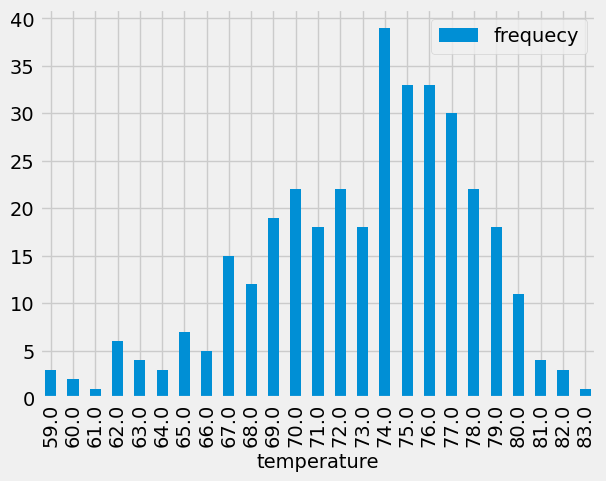

In [62]:
# I think I made a histogram the hard way
temp_freq_df.set_index("temperature").plot.bar()
plt.show()

In [64]:
session.close()